1.1

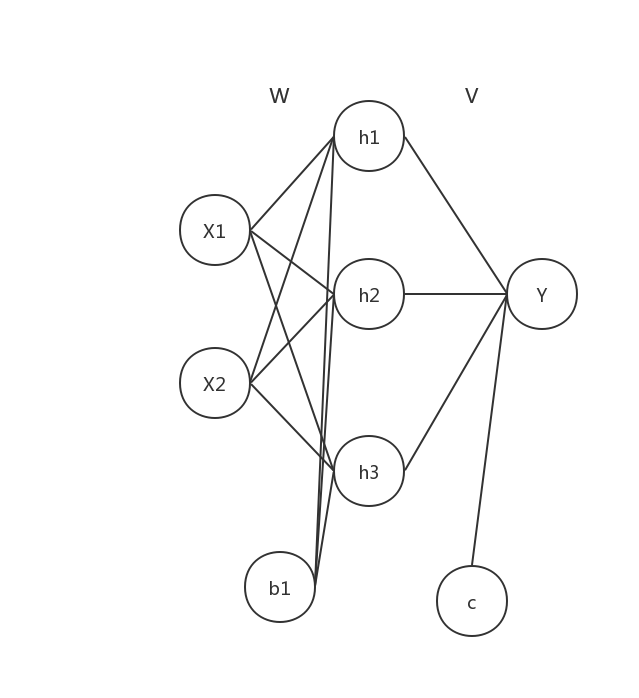

1.2

$
y=\sigma(v_1h_1+v_2h_2+v_3h_3+c)\\
h_i=ReLU(w_1i+w_2i+b)
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def relu(x):
    return np.where(x>0, x, 0)

In [3]:
def ff_nn_relu(W, X, b, V, c):
    h = relu(np.dot(X, W)+b)
    y = sigmoid(np.dot(h, V)+c)
    return y
W = np.array([[1,-1,0],[0,0,.5]])
X = np.array([[1, -1], [0, -1], [0, 1]])
b = np.array([0, 0, 1])
V = np.array([[1],[0],[-1]])
c = np.array([1])
Y = ff_nn_relu(W,X,b,V,c)
Y

array([[0.81757448],
       [0.62245933],
       [0.37754067]])

sample1:0.81757448, sample2:0.62245933, sample3:0.37754067

Question 2

2.1

$
\dfrac{\partial f}{\partial x}=-3x^2+200x-200y^2 \\
\dfrac{\partial f}{\partial y}=400y^3-400xy
$

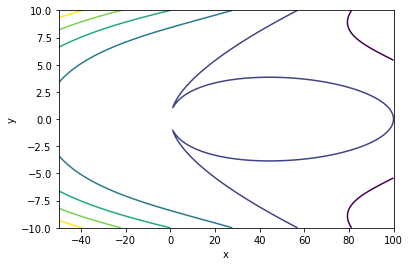

In [4]:
x, y = np.meshgrid(np.linspace(-50, 100, 500), np.linspace(-10, 10, 500))
z = 1 - x**3 + 100*(y**2-x)**2
plt.subplot()
plt.contour(x, y, z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

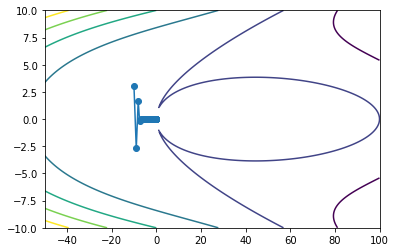

In [5]:
def grad(vec):
    x, y = vec
    dx = -3*x**2+200*x-200*y**2
    dy = 400*y**3 - 400*x*y
    return np.array([dx,dy])

def grad_dec(start, iteration, lr):
    loc = start
    traj = [loc]
    for i in range(iteration):
        g = grad(loc)
        loc = loc - g*lr
        traj.append(loc)
    return np.array(traj)

start = np.array([-10, 3])
lr = 0.00025
traj = grad_dec(start,500,lr)
fig, ax = plt.subplots()
pic = ax.contour(x,y,z)
X = traj[:,0]
Y = traj[:,1]
plt.plot(X,Y,'-o')


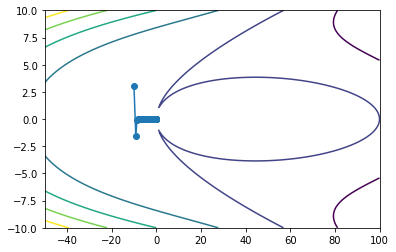

In [6]:
lr = 0.0002
traj = grad_dec(start,100,lr)
fig, ax = plt.subplots()
pic = ax.contour(x,y,z)
X = traj[:,0]
Y = traj[:,1]
plt.plot(X,Y,'-o')

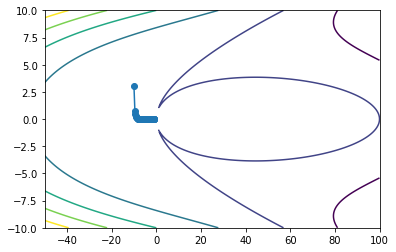

In [7]:
lr = 0.0001
traj = grad_dec(start,100,lr)
fig, ax = plt.subplots()
pic = ax.contour(x,y,z)
X = traj[:,0]
Y = traj[:,1]
plt.plot(X,Y,'-o')

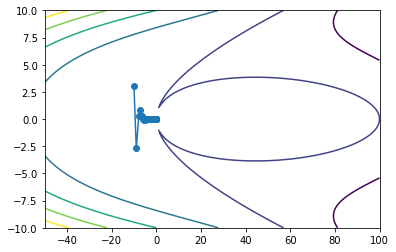

In [8]:
def grad_m(alpha, start, iteration, lr):
    loc = start
    traj = [loc]
    v = np.zeros(start.size)
    for i in range(iteration):
        g = grad(loc)
        v = alpha*v + g*lr
        loc = loc - v
        traj.append(loc)
    return np.array(traj)

start = np.array([-10, 3])
lr = 0.00025
alpha = 0.25
traj = grad_m(alpha,start,100,lr)
fig, ax = plt.subplots()
pic = ax.contour(x,y,z)
X = traj[:,0]
Y = traj[:,1]
plt.plot(X,Y,'-o')

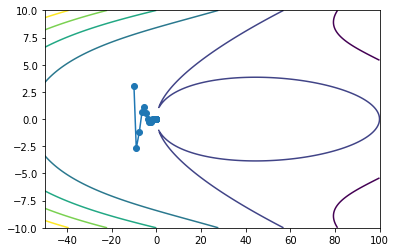

In [9]:
alpha = 0.5
traj = grad_m(alpha,start,100,lr)
fig, ax = plt.subplots()
pic = ax.contour(x,y,z)
X = traj[:,0]
Y = traj[:,1]
plt.plot(X,Y,'-o')

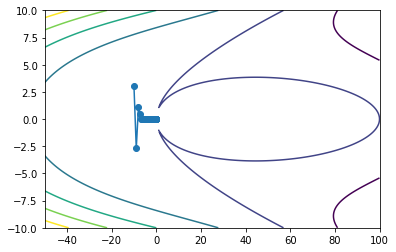

In [10]:
alpha = 0.1
traj = grad_m(alpha,start,100,lr)
fig, ax = plt.subplots()
pic = ax.contour(x,y,z)
X = traj[:,0]
Y = traj[:,1]
plt.plot(X,Y,'-o')

Question 3

$
in_y=\vec{h}\cdot\vec{v}+c\\
\dfrac {dL}{d\hat{y}}=-(\dfrac{y}{\hat{y}}-\dfrac{1-y}{1-\hat{y}})\\
\dfrac {\partial{L}}{\partial{c}}=\sigma(in_y)[1-\sigma(in_y)]\dfrac {dL}{d\hat{y}}\\
\dfrac {\partial{L}}{\partial{\vec{v}}}=\vec{h}\sigma(in_y)[1-\sigma(in_y)]\dfrac {dL}{d\hat{y}}\\
in_h=\vec{x}\cdot\vec{w}+b\\
\dfrac {\partial{L}}{\partial{\vec{b}}}=ReLU'(in_h)\dfrac{dL}{d\hat{y}} \dfrac{\partial{in_y}}{\partial{\vec{h}}}\\
\dfrac {\partial{L}}{\partial{\vec{w}}}=\vec{x}ReLU'(in_h)\dfrac{dL}{d\hat{y}} \dfrac{\partial{in_y}}{\partial{\vec{h}}}\\
$

In [24]:
def loss(yhat, y):
    l = -(y*np.log(yhat)+(1-y)*np.log(1-yhat)).sum()
    return l

def dCross(yhat, y):
    return -(y/yhat - (1-y)/(1-yhat))

def grad_f(X, W, b, V, c, y):
    y_hat = ff_nn_relu(W,X,b,V,c)
    L = loss(y_hat, y)
    dL = dCross(y_hat, y)
    inh = np.dot(X,W)+b
    H = relu(inh)
    dc = dL*sigmoid(np.dot(H,V)+c)*(1-sigmoid(np.dot(H,V)+c))
    dV = np.dot(dc.T,H).T
    db = np.where(inh>0,1,0)*np.dot(dL,V.T)
    dW = np.dot(X.T, db)
    return L, np.average(dc, axis=0), dV, np.average(db, axis=0), dW
    

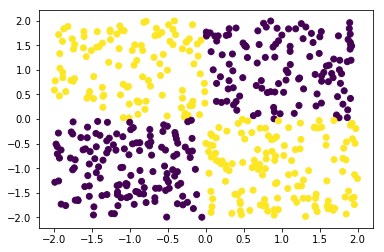

In [25]:
rng = np.random.RandomState(0)
X = 4*rng.rand(500, 2)-2
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.scatter(X[:,0], X[:,1], c=Y)

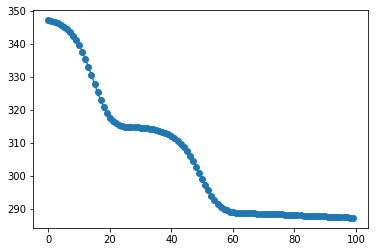

In [29]:
def grad_decsent(x, y, w, b, v, c, iteration, lr):
    yhat = ff_nn_relu(w,x,b,v,c)
    losses = []
    paras = np.array([w,b,v,c])
    for i in range(iteration):
        L, dc, dv, db, dw = grad_f(x,w,b,v,c,y)
        losses.append(L)
        grads = np.array([dw,db,dv,dc])
        paras = paras - grads*lr
        w,b,v,c = paras
    return losses

w_init = np.random.uniform(-0.1,0.1,size=6).reshape(2,3)
b_init = np.random.uniform(-0.1,0.1,size=3).reshape(1,3)
v_init = np.random.uniform(-0.1,0.1,size=3).reshape(3,1)
c_init = np.random.uniform(-0.1,0.1,size=1)

iteration = 100
lr = 0.001
Y = np.where(Y,1,0).reshape(500,1)
ls = grad_decsent(X,Y,w_init,b_init,v_init,c_init, iteration, lr)
plt.plot(ls,'-o')

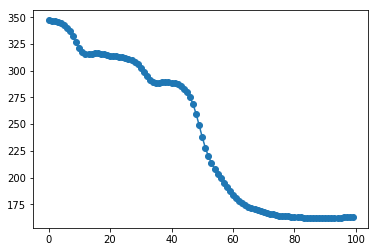

In [36]:
def grad_decsent_m(x, y, w, b, v, c, iteration, lr, alpha):
    yhat = ff_nn_relu(w,x,b,v,c)
    losses = []
    paras = np.array([w,b,v,c])
    V = np.array([np.zeros(w.shape), np.zeros(b.shape), np.zeros(v.shape), np.zeros(c.shape)])
    for i in range(iteration):
        L, dc, dv, db, dw = grad_f(x,w,b,v,c,y)
        losses.append(L)
        grads = np.array([dw,db,dv,dc])
        V = alpha*V + lr*grads
        paras = paras - V
        w,b,v,c = paras
    return losses, paras

iteration = 100
lr = 0.001
alpha = 0.6
Y = np.where(Y,1,0).reshape(500,1)
ls, paras = grad_decsent_m(X,Y,w_init,b_init,v_init,c_init, iteration, lr, alpha)
plt.plot(ls,'-o')

Obviously, the momentum method doesn't make my model converge more efficiently

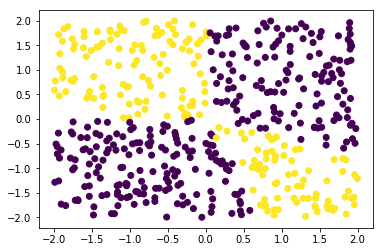

In [37]:
w,b,v,c = paras
y_pred = ff_nn_relu(w, X, b, v, c)
y_pred[y_pred >=0.5] = 1
y_pred[y_pred < 0.5] = 0
plt.scatter(X[:,0],X[:,1],c=y_pred.reshape(500))